### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/univariate">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
!git clone 'http://github.com/Nak007/univariate.git'

## Example

In [23]:
from sklearn.datasets import load_breast_cancer
import pandas as pd, numpy as np, sys
from scipy import stats
import matplotlib.pyplot as plt
pd.options.display.float_format = "{:,.4f}".format

sys.path.append('/content/univariate')
from Univariate import *

**<font size=5 color='green'> UnivariateOutliers </font>**

---

`UnivariateOutliers` determines univariate outliers within one variable at a time. Any identified outlier, is capped to the lower/upper value.

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [17]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names

Randomly replace numerical value with `np.nan`.

In [18]:
np.random.seed(0)
NaN = np.random.random(X.shape)<0.1
X = pd.DataFrame(np.where(NaN, np.nan, X), columns=cols).iloc[:,:5]

Add non-numeric and all-nan fields

In [19]:
X['only_str'], X['all_nan'] = 'only_str', np.nan

Univariate outlier detection methods
- "**pct**"   : Percentile
- "**sigma**" : Z-score
- "**iqr**"   : Interquartile range
- "**grubb**" : Grubbs' test (Grubbs 1969 and Stefansky 1972)
- "**gesd**"  : Generalized Extreme Studentized Deviate
- "**mad**"   : Median Absolute Deviation
- "**mae**"   : Mean Absolute Error

In [20]:
model = UnivariateOutliers().fit(X)

<ipython-input-7-91b693ada3fa>:40: UserWarning: Data variables must be numerical. List of non-numerical variables: ['only_str']
  warn(message)
<ipython-input-7-91b693ada3fa>:51: UserWarning: Data variables must contain numerical values more than 10 records. List of invalid variables: ['all_nan']
  warn(message)


Excluded variables

In [21]:
model.exclude

{'non_numeric': ['only_str'], 'min_numeric': ['all_nan']}

In [24]:
model.info

,variable,lower,upper,n_lower,n_upper,n_outlier,n_notnan,p_outlier
0,mean radius,5.5756,24.7270,0,5,5,510,0.0098
1,mean smoothness,0.0548,0.1405,1,3,4,498,0.0080
2,mean perimeter,35.2002,161.3682,0,5,5,505,0.0099
3,mean area,-90.4158,"1,669.9444",0,12,12,506,0.0237
4,mean texture,8.1884,32.4571,0,3,3,513,0.0058


In [25]:
model.capped_X.head(5)

,mean radius,mean smoothness,mean perimeter,mean area,mean texture
0,17.9900,0.1184,122.8000,"1,001.0000",10.3800
1,20.5700,NaN,132.9000,"1,326.0000",17.7700
2,19.6900,0.1096,130.0000,"1,203.0000",21.2500
3,11.4200,0.1405,77.5800,386.1000,20.3800
4,20.2900,0.1003,135.1000,"1,297.0000",14.3400


**<font size=5 color='green'> chi2_test </font>**

---

A chi-square goodness of fit test determines whether sample data fits a particular population.

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [26]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

$H_{0}$ : data follows a normal distribution.

$H_{A}$ : data does not follow a normal distribution.

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

In [27]:
chi2_test(x, dist="norm")

Chi2_Test(chisq=0.4773224553586323, df=9, pvalue=0.9999750744566653, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

If shape-related parameters are known e.g. $\mu$ or $\sigma$ or true population, we can freeze them for the instance of the distribution.

In [28]:
chi2_test(x, dist=stats.norm(loc=2, scale=2))

Chi2_Test(chisq=0.5705377388241217, df=9, pvalue=0.9999464408294994, dist='norm', params={'args': (), 'kwds': {'loc': 2, 'scale': 2}})

If $\alpha$ is 5% (0.05), we can not reject the null hypothesis (0.99 > 0.05). Or we can determine the critical value as follows:

In [29]:
print('Degrees of freedom = {:,.0f}'.format(9))
print('Critical Value = {:,.4f}'.format(stats.chi2.ppf(0.95, 9)))

Degrees of freedom = 9
Critical Value = 16.9190


We cannot reject the null hypotheis since $\chi^{2}$ is 0.477, which is less than $\chi^{2}_{\alpha=0.05, df=7}$ = 16.919

**<font size=5 color='green'> qq_plot </font>**

---

Standard quantile-quantile (Q-Q) plot (Wilk and Gnanadesikan, 1968) is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other [wikipedia](https://en.wikipedia.org/wiki/Q–Q_plot).

Create normal random variable x ~ $N(\mu,\sigma)$ = (2, 2).

In [30]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

See whether `x` follows normal or uniform distribution.

In [31]:
qq_plot(x, dist="norm")

QQ_plot(r=0.9998759256965545, statistic=0.6020687774273007, rmse=0.06358873382864735, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

In [32]:
qq_plot(x, dist="uniform")   

QQ_plot(r=0.9717582798499491, statistic=0.6020687774273007, rmse=1.239596599563976, dist='uniform', params=(-3.5451855128533003, 10.93763361798046))

In this case, "**norm**" returns higher value of `r` along with smaller value of `mse`, thus we could say that a random variable `x`, has a distribution similar to a normal random distribution, $N(\mu=2,\sigma=2)$. However, visualizing a Q-Q plot is highly recommended as indicators can sometimes be inadequate to conclude "**goodness of fit**" of both distributions.

**<font size=5 color='green'> ks_test </font>**

---

The two-sample Kolmogorov-Smirnov test is a general nonparametric method for comparing two distributions by determining the maximum distance from the cumulative distributions, whose function (`s`) can be expressed as:

> $s(x,m) = \frac{f(m,x)}{n(m)}$

where f(m,x) is a cumulative frequency of distribution m given x and n(m) is a number of samples of m. The Kolmogorov–Smirnov statistic for two given cumulative distribution function, a and b is:
    
> $D(a,b) = max|s(x,a) - s(x,b)|$
                
where $a \cup b$ = {x: x $\in$ a or x $\in$ b}. The null hypothesis or H0 says that both independent samples have the same distribution.

Create normal random variable x ~ N(μ,σ) = (2,2).

In [33]:
x = stats.norm(loc=2, scale=2).rvs(size=500, random_state=0)

See whether x follows normal distribution or not.

In [36]:
ks_test(x, dist="norm")

KsTest(statistic=0.019977940054987653, pvalue=0.9861531824750324, dist='norm', params=(1.9492911213351323, 1.9963135546858515))

If $\alpha$ is 5% (0.05), we can not reject the null hypothesis (0.986 > 0.05).

**<font size=5 color='green'> MatchDist </font>**

---

Matching distribution with data by using following methods:
- Chi-Square Test
- Kolmogorov-Smirnov Test
- Q-Q plot

Use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [37]:
X, y = load_breast_cancer(return_X_y=True)
cols = load_breast_cancer().feature_names
X = pd.DataFrame(X, columns=cols)

In [38]:
model = MatchDist().fit(X)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:7901: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:1727: RuntimeWarning: overflow encountered in exp
  f = 1 + np.log(b) + sc.xlogy(b - 1.0, x) + xb - np.exp(xb)
<ipython-input-5-fdbce2650ff1>:94: RuntimeWarning: divide by zero encountered in true_divide
  chisq = ((observe-expect)**2/expect).sum()
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making goo

Summary of results

In [39]:
model.info.sample(5)

,variable,chi2_chisq,chi2_pvalue,chi2_dist,ks_statistic,ks_pvalue,ks_dist,qq_r,qq_rmse,qq_dist
13,mean symmetry,3.4113,1.0000,lognorm,0.0285,0.7331,lognorm,0.9988,0.0014,lognorm
23,worst smoothness,2.4715,1.0000,tukeylambda,0.0236,0.9019,tukeylambda,0.9992,0.0012,gamma
11,worst concave points,7.1615,0.9933,gamma,0.0459,0.1754,gamma,0.9978,0.0046,beta
21,concavity error,6.0467,0.9978,lognorm,0.0278,0.7599,lognorm,0.9994,0.0013,lognorm
17,compactness error,2.8697,1.0000,lognorm,0.0294,0.6991,lognorm,0.9990,0.0010,lognorm


To visualize the distribution, use `plotting` function.

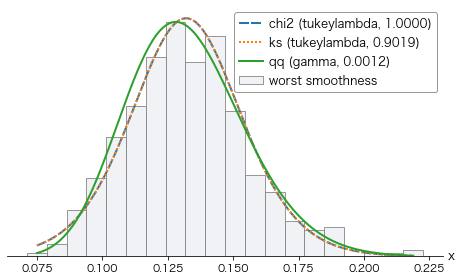

In [49]:
ax = model.plotting(np.random.choice(cols))

**<font size=5 color='green'> Compare2samp </font>**

---

Determine goodness of fit between two sets of data by using following methods:

- Chi-Square Test
- Kolmogorov-Smirnov Test (**scipy.stats.ks_2samp**)
- Population Stability Index (PSI)

**Note**: This function runs on scikit-learn 0.24.2

In [50]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
random_X = X.sample(200).copy()

In [51]:
model = Compare2samp(frac=0.02, max_category=1000).fit(X, random_X)

Summary of results

In [52]:
model.info.head()

,chi2_chisq,chi2_df,chi2_pvalue,chi2_bins,ks_stat,ks_pvalue,psi,dtype
variable,,,,,,,,
pclass,0.4157,2,0.8123,3,0.0316,0.9926,0.0041,int32
age,1.5520,7,0.9805,8,0.0558,0.6298,0.0154,float32
sibsp,0.1335,2,0.9354,3,0.0107,1.0000,0.0013,int32
parch,0.1121,2,0.9455,3,0.0097,1.0000,0.0012,int32
fare,0.1799,2,0.9140,3,0.0635,0.4654,0.0231,float32


To visualize, use `plotting`.

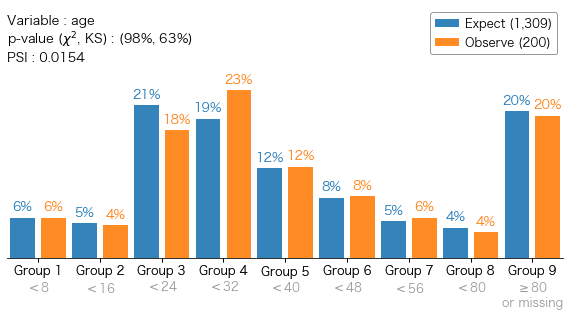

In [59]:
var = np.random.choice(list(model.result.keys()))
ax = model.plotting(var, max_display=1)

**<font size=5 color='green'> Descriptive </font>**

---

Descriptive statistics.

We use the breast cancer wisconsin dataset (`load_breast_cancer`).

In [61]:
X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(X, columns=load_breast_cancer().feature_names)

In [62]:
model = Descriptive().fit(X)

Summary of results
- **Descriptive.num_info** (numerical)
- **Descriptive.str_info** (non-numerical)

In [63]:
model.num_info.iloc[:,:5].head()

variable,area error,compactness error,concave points error,concavity error,fractal dimension error
unique,528.0000,541.0000,507.0000,533.0000,545.0000
missing,0.0000,0.0000,0.0000,0.0000,0.0000
mean,40.3371,0.0255,0.0118,0.0319,0.0038
std,45.4510,0.0179,0.0062,0.0302,0.0026
fisher skew,5.4328,1.8972,1.4409,5.0970,3.9136


To visualize the distribution, use `plotting` function.

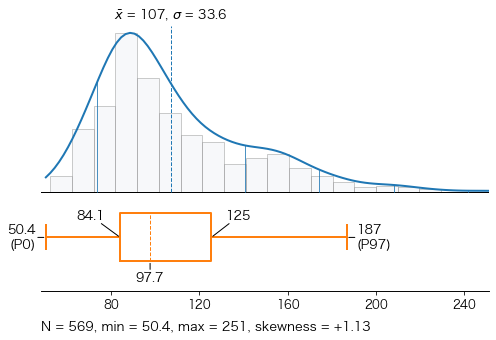

In [66]:
ax = model.plotting(np.random.choice(X.columns))